 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/jupyter/Estradas%201.ipynb#Curva-horizontal" data-toc-modified-id="Curva-horizontal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Curva horizontal</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/jupyter/Estradas%201.ipynb#Curva-circular-simples" data-toc-modified-id="Curva-circular-simples-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Curva circular simples</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/jupyter/Estradas%201.ipynb#Tangente-externa" data-toc-modified-id="Tangente-externa-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Tangente externa</a></span></li><li><span><a href="http://localhost:8888/notebooks/jupyter/Estradas%201.ipynb#Grau-da-curva" data-toc-modified-id="Grau-da-curva-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Grau da curva</a></span></li><li><span><a href="http://localhost:8888/notebooks/jupyter/Estradas%201.ipynb#Desenvolvimento---comprimento-do-arco" data-toc-modified-id="Desenvolvimento---comprimento-do-arco-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Desenvolvimento - comprimento do arco</a></span></li><li><span><a href="http://localhost:8888/notebooks/jupyter/Estradas%201.ipynb#Deflexão" data-toc-modified-id="Deflexão-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Deflexão</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/jupyter/Estradas%201.ipynb#Exercicio-1" data-toc-modified-id="Exercicio-1-1.1.4.1"><span class="toc-item-num">1.1.4.1&nbsp;&nbsp;</span>Exercicio 1</a></span></li></ul></li></ul></li></ul></li></ul></div>

In [14]:
import pint
u = pint.UnitRegistry()
import numpy as np

# Curva horizontal

## Curva circular simples

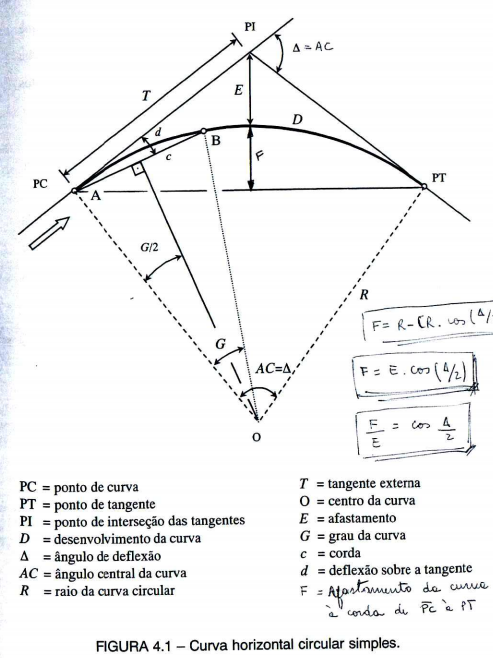

### Tangente externa

$$T = R \cdot tan (\frac{AC}{2})$$
- T (metros): comprimento da tangente externa
- R (metros): raio da curva
- AC (radianos): angulo da curva central

In [15]:
def t(raio_metros,anguloCentral_radianos):
    """Tangente Externa
    args:
        r (metros): raio da curva
        AC (radianos): angulo central da curva
    """
    return raio_metros*tan((anguloCentral_radianos/2))

### Grau da curva


$$G = \frac{180 \cdot c}{\pi \cdot R}$$

- c (metros): comprimento de corda
- R (metros): raio da curva

**Deve ser múltiplo de 40'**
1. Adotar raio provisório
2. Determinar grau de curva e arredondar para múltiplo de 40'
3. Agora pode-se achar raio verdadeiro


In [16]:
def dd2dms(deg):
    """Transforma grau decimal em graus minutos e segundos
    """
    d = int(deg)
    md = abs(deg - d) * 60
    m = int(md)
    sd = (md - m) * 60
    return [d, m, sd]

def dd2ms(deg):
    """Transforma grau decimal em apenas minutos e segundos
    """
    d = int(deg) * 60
    md = abs(deg - int(deg))
    m = int(md)
    sd = (md - m) * 60
    return d+ sd

def ms2dd(minutes, seconds):
    """Transforma minutos para graus decimais
    """
    dd = float(minutes)/60 + float(seconds)/(60*60)
    return dd

def G(corda_metros, raio_metros):
    """Grau da curva em radianos
    args:
        corda (metros): comprimento da corda
        raio (metros): raio da curva
    """
    return (180 * u.degree * corda_metros / (np.pi * raio_metros))
    

### Desenvolvimento - comprimento do arco

$$D = \frac{AC \cdot \pi \cdot R}{180}$$

Comprimento em metros do PC (ponto de curva) até PT (ponto de tangente)

In [17]:
def D(anguloCentral_graus, raio_metros):
    """Comprimento em metros do arco
    """
    return anguloCentral_graus*np.pi*raio_metros/180

### Deflexão

Primeira deflexão
$$ds_1 = (20 - a) \cdot \frac{G}{2c}$$

Demais deflexões
$$ds_n = b \cdot \frac{G}{2c}$$

#### Exercicio 1
Angulo curva = 46

Raio entre 100 e 600 metros

P1 = 145 + 2.4

In [18]:
AC = 46 * u.degree
R = 100 * u.meter

Como o raio está entre 600 e 100, adotar corda de 10.
Determinar Grau provisório múltiplo de 40.

In [19]:
c = 10 * u.meter
G10_ = G(c,R)
G10_

<Quantity(5.729577951308232, 'degree')>

Arredondando para multiplo de 40

In [20]:
print(dd2ms(G10_.magnitude),"minutos")

343.77467707849394 minutos


Adotar 320 minutos, que equivale em graus a:

In [21]:
dd = ms2dd(320,0)
dms = dd2dms(dd)
print("{} graus decimais \n {} graus minutos segundos".format(dd,dms))

5.333333333333333 graus decimais 
 [5, 19, 59.999999999998934] graus minutos segundos


Achar o raio utilizado

In [22]:
R = (180 * c) / (np.pi * dd)
R

<Quantity(107.42958658702936, 'meter')>

In [23]:
d = D(AC, R)
d

<Quantity(86.25, 'degree * meter')>